<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
import re
import statistics
import matplotlib.pyplot as plt

## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [7]:
path_to_file = 'C:\\Users\\shani\\Desktop\\NP 3.1\\DL\\Assignment 2\\Problem 2\\Harry_Potter_Book1.txt'
text = open(path_to_file, 'rb').read().decode(encoding='utf-8').lower()

print('Corpus length:', len(text))

Corpus length: 474429


In [8]:
# Take a look at the first 250 characters in text
print(text[:1500])

/ 




the boy who lived 

mr. and mrs. dursley, of number four, privet drive, 
were proud to say that they were perfectly normal, 
thank you very much. they were the last people you’d 
expect to be involved in anything strange or 
mysterious, because they just didn’t hold with such 
nonsense. 

mr. dursley was the director of a firm called 
grunnings, which made drills. he was a big, beefy 
man with hardly any neck, although he did have a 
very large mustache. mrs. dursley was thin and 
blonde and had nearly twice the usual amount of 
neck, which came in very useful as she spent so 
much of her time craning over garden fences, spying 
on the neighbors. the dursley s had a small son 
called dudley and in their opinion there was no finer 
boy anywhere. 

the dursleys had everything they wanted, but they 
also had a secret, and their greatest fear was that 
somebody would discover it. they didn’t think they 
could bear it if anyone found out about the potters. 
mrs. potter was mrs. dursl

In [9]:
# Length of extracted character sequences
maxlen = 250

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Number of sequences: 158060
sentences[0]:  / 




the boy who lived 

mr. and mrs. dursley, of number four, privet drive, 
were proud to say that they were perfectly normal, 
thank you very much. they were the last people you’d 
expect to be involved in anything strange or 
mysterious, becaus
next_chars[0]:  e


sentences[1]:  



the boy who lived 

mr. and mrs. dursley, of number four, privet drive, 
were proud to say that they were perfectly normal, 
thank you very much. they were the last people you’d 
expect to be involved in anything strange or 
mysterious, because t
next_chars[1]:  h
Unique characters: 59
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '—', '‘', '’', '“', '”', '•', '■']


### 1.2 Data Processing


#### Remove punctuations from text

In [10]:
# remove punctuations
cleaned_text = re.sub(r'[^\w\s]', '', text)

print('Corpus length:', len(cleaned_text))
print(cleaned_text[:500])

Corpus length: 450493
 




the boy who lived 

mr and mrs dursley of number four privet drive 
were proud to say that they were perfectly normal 
thank you very much they were the last people youd 
expect to be involved in anything strange or 
mysterious because they just didnt hold with such 
nonsense 

mr dursley was the director of a firm called 
grunnings which made drills he was a big beefy 
man with hardly any neck although he did have a 
very large mustache mrs dursley was thin and 
blonde and had nearly twic


In [11]:
# Length of extracted character sequences
maxlen = 250

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(cleaned_text) - maxlen, step):
    sentences.append(cleaned_text[i: i + maxlen])
    next_chars.append(cleaned_text[i + maxlen])
    
# List of unique characters in the corpus
chars = sorted(list(set(cleaned_text)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 38
['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


#### Remove number and line break from text

In [12]:
cleaned_text = ''.join(c for c in cleaned_text if not c.isdigit())
cleaned_text = cleaned_text.replace('\n', '')

In [13]:
# Length of extracted character sequences
maxlen = 250

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(cleaned_text) - maxlen, step):
    sentences.append(cleaned_text[i: i + maxlen])
    next_chars.append(cleaned_text[i + maxlen])
    
# List of unique characters in the corpus
chars = sorted(list(set(cleaned_text)))
print("sentences[0] \n" + sentences[0])
print('Unique characters:', len(chars))
print(chars)

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

sentences[0] 
 the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hol
Unique characters: 27
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [14]:
def sliding_window(text, window_size):
    inputs = []
    labels = []

    for i in range (0, len(text) - window_size, 1):
        inputs.append(text[i: i + window_size])
        labels.append(text[i + window_size])

    print("Number of sequences: ", len(inputs))
    return inputs, labels

In [15]:
# one-hot encode the characters into binary arrays.
def encode_text(text, window_size):
    inputs, labels = sliding_window(text, window_size)
    
    X = np.zeros((len(inputs), window_size, len(chars)), dtype=bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool_)
    for i, inputs in enumerate(inputs):
        for t, char in enumerate(inputs):
            X[i, t, char_indices[char]] = 1
        y[i, char_indices[labels[i]]] = 1
    
    return X, y, inputs, labels

## Step 2 – Develop Character Generator Model

In [16]:
window_size = 50
X,y,inputs, labels = encode_text(cleaned_text, window_size)

Number of sequences:  434191


In [18]:
X[0]

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False])

In [12]:
inputs

'arry potter and the philosophers stone  jk rowling'

In [12]:
model = keras.models.Sequential()
model.add(layers.LSTM(256, input_shape=(window_size, len(chars)), return_sequences = True))
model.add(layers.LSTM(256, input_shape=(window_size, len(chars)), recurrent_dropout = 0.3, return_sequences = True))
model.add(layers.LSTM(256, input_shape=(window_size, len(chars)), recurrent_dropout = 0.3))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 256)           290816    
                                                                 
 lstm_1 (LSTM)               (None, 50, 256)           525312    
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 27)                6939      
                                                                 
Total params: 1,348,379
Trainable params: 1,348,379
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, epochs=8, batch_size=512, validation_split =0.2)

Epoch 1/8
679/679 [==============================] - 2386s 4s/step - loss: 2.2902 - accuracy: 0.3292 - val_loss: 1.8261 - val_accuracy: 0.4502
Epoch 2/8
679/679 [==============================] - 2764s 4s/step - loss: 1.6598 - accuracy: 0.4955 - val_loss: 1.5384 - val_accuracy: 0.5272
Epoch 3/8
679/679 [==============================] - 3217s 5s/step - loss: 1.4478 - accuracy: 0.5527 - val_loss: 1.4044 - val_accuracy: 0.5646
Epoch 4/8
679/679 [==============================] - 3303s 5s/step - loss: 1.3406 - accuracy: 0.5826 - val_loss: 1.3317 - val_accuracy: 0.5831
Epoch 5/8
679/679 [==============================] - 3259s 5s/step - loss: 1.2721 - accuracy: 0.6008 - val_loss: 1.2977 - val_accuracy: 0.5956
Epoch 6/8
679/679 [==============================] - 3180s 5s/step - loss: 1.2221 - accuracy: 0.6148 - val_loss: 1.2655 - val_accuracy: 0.6032
Epoch 7/8
679/679 [==============================] - 3184s 5s/step - loss: 1.1828 - accuracy: 0.6265 - val_loss: 1.2470 - val_accuracy: 0.6094

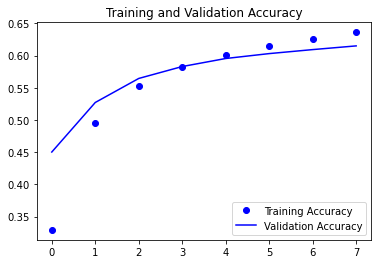

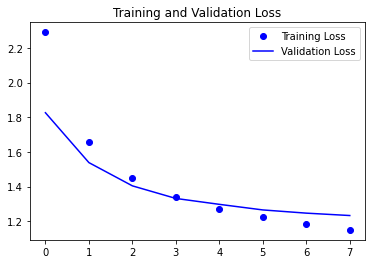

Average val accuracy: 0.5685651004314423
Average val loss: 1.393004685640335


In [14]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(8)

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure()


plt.plot(epochs_range, loss,'bo', label='Training Loss')
plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("Average val accuracy: " + str(statistics.mean(val_acc)))
print("Average val loss: " + str(statistics.mean(val_loss)))

In [ ]:
# Save the Model
model.save('model1.h5')

In [14]:
model2 = keras.models.Sequential()
model2.add(layers.GRU(256, input_shape=(window_size,len(chars)), return_sequences = True))
model2.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences = True))
model2.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences = True, recurrent_dropout = 0.2))
model2.add(layers.GRU(256, input_shape=(window_size, len(chars)), recurrent_dropout = 0.4, dropout=0.2))
model2.add(layers.Dense(len(chars), activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 256)           218880    
                                                                 
 gru_1 (GRU)                 (None, 50, 256)           394752    
                                                                 
 gru_2 (GRU)                 (None, 50, 256)           394752    
                                                                 
 gru_3 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 27)                6939      
                                                                 
Total params: 1,410,075
Trainable params: 1,410,075
Non-trainable params: 0
_________________________________________________________________


In [18]:
optimizer = optimizers.RMSprop(learning_rate=0.002)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(X, y, epochs=10, batch_size=1024, validation_split =0.3)

Epoch 1/10
297/297 [==============================] - 1127s 4s/step - loss: 1.1731 - accuracy: 0.6280 - val_loss: 1.2054 - val_accuracy: 0.6206
Epoch 2/10
297/297 [==============================] - 1091s 4s/step - loss: 1.1552 - accuracy: 0.6336 - val_loss: 1.2053 - val_accuracy: 0.6212
Epoch 3/10
297/297 [==============================] - 1155s 4s/step - loss: 1.1454 - accuracy: 0.6360 - val_loss: 1.2053 - val_accuracy: 0.6234
Epoch 4/10
297/297 [==============================] - 1146s 4s/step - loss: 1.1346 - accuracy: 0.6396 - val_loss: 1.2085 - val_accuracy: 0.6246
Epoch 5/10
297/297 [==============================] - 1153s 4s/step - loss: 1.1244 - accuracy: 0.6419 - val_loss: 1.2123 - val_accuracy: 0.6236
Epoch 6/10
297/297 [==============================] - 1108s 4s/step - loss: 1.1166 - accuracy: 0.6447 - val_loss: 1.2136 - val_accuracy: 0.6225
Epoch 7/10
297/297 [==============================] - 1073s 4s/step - loss: 1.1088 - accuracy: 0.6473 - val_loss: 1.2170 - val_accuracy:

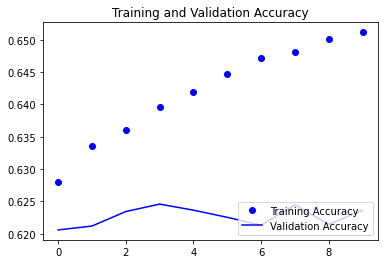

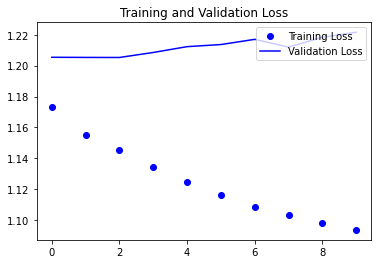

Average val accuracy: 0.6226872801780701
Average val loss: 1.2119280815124511


In [19]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure()


plt.plot(epochs_range, loss,'bo', label='Training Loss')
plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("Average val accuracy: " + str(statistics.mean(val_acc)))
print("Average val loss: " + str(statistics.mean(val_loss)))

In [20]:
model2.save('model2.h5')

## Step 3 – Use the developed Model to generate the characters / sentences

### GRU Model

In [13]:
# Load the model
gruModel = keras.models.load_model('model2.h5')

In [4]:
# takes the user input
text_input = np.array([input()])
text_input_str = text_input.tolist()[0].lower()

 Anna would enjoy a visit to the zoo because frogs pigs and monkeys play xylophones with people from quahog


In [5]:
# Length of extracted character sequences
maxlen = 50

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

# List of unique characters in the corpus
chars = sorted(list(set(text_input_str)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 27
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
def sliding_window(text, window_size):
    inputs = []
    labels = []

    for i in range (0, len(text) - window_size, 1):
        inputs.append(text[i: i + window_size])
        labels.append(text[i + window_size])

    print("Number of sequences: ", len(inputs))
    return inputs, labels

# one-hot encode the characters into binary arrays.
def encode_text(text, window_size):
    inputs, labels = sliding_window(text, window_size)
    
    X = np.zeros((len(inputs), window_size, len(chars)), dtype=bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool_)
    for i, inputs in enumerate(inputs):
        for t, char in enumerate(inputs):
            X[i, t, char_indices[char]] = 1
        y[i, char_indices[labels[i]]] = 1
    
    return X, y, inputs, labels

In [7]:
window_size = 50
X,y,inputs, labels = encode_text(text_input_str, window_size)

Number of sequences:  56


In [8]:
inputs

'and monkeys play xylophones with people from quaho'

In [9]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [10]:
# Use the Best Model to generate 400 characters
import random
import sys

for epoch in range(1, 60):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    gruModel.fit(X, y,
              batch_size=512,
              epochs=1)

    # Select a text seed at random
    # start_index = random.randint(0, len(text) - maxlen - 1)    
    
    generated_text_initial = inputs
    print('--- Generating with seed: "' + generated_text_initial + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        generated_text = inputs
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
1/1 [==============================] - 4s 4s/step - loss: 2.6780 - accuracy: 0.3929
--- Generating with seed: "and monkeys play xylophones with people from quaho"
------ temperature: 0.2
and monkeys play xylophones with people from quahoghs and for his family and harry followed as though he was starting to stop his face and for a small got of forgotten for my monkoon and monkson the snitch on the corner of the station of potters and moment he had been quickly on the corner of the fight and goyle wand monksome what harry followed and goyle who was going to go on the statues that moment what he was something what something he would
------ temperature: 0.5
and monkeys play xylophones with people from quahoghs were make my for the potters not allowed to make you moved not play no not of you ron he said in a gryffindor common world you said hagrid nothing points  you won something he was flooning maybe they were off and pointing up and moment why started and flying that something wh

### LSTM Model

In [68]:
# Load the model
lstmModel = keras.models.load_model('model1.h5')

In [12]:
# takes the user input
text_input = np.array([input()])
text_input_str = text_input.tolist()[0].lower()

 Anna would enjoy a visit to the zoo because frogs pigs and monkeys play xylophones with people from quahog


In [13]:
# Length of extracted character sequences
maxlen = 50

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

# List of unique characters in the corpus
chars = sorted(list(set(text_input_str)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 27
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [14]:
def sliding_window(text, window_size):
    inputs = []
    labels = []

    for i in range (0, len(text) - window_size, 1):
        inputs.append(text[i: i + window_size])
        labels.append(text[i + window_size])

    print("Number of sequences: ", len(inputs))
    return inputs, labels

# one-hot encode the characters into binary arrays.
def encode_text(text, window_size):
    inputs, labels = sliding_window(text, window_size)
    
    X = np.zeros((len(inputs), window_size, len(chars)), dtype=bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool_)
    for i, inputs in enumerate(inputs):
        for t, char in enumerate(inputs):
            X[i, t, char_indices[char]] = 1
        y[i, char_indices[labels[i]]] = 1
    
    return X, y, inputs, labels

In [15]:
window_size = 50
X,y,inputs, labels = encode_text(text_input_str, window_size)

Number of sequences:  56


In [16]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [17]:
# Use the Best Model to generate 400 characters
import random
import sys

for epoch in range(1, 60):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    lstmModel.fit(X, y,
              batch_size=512,
              epochs=1)

    # Select a text seed at random
    # start_index = random.randint(0, len(text) - maxlen - 1)    
    
    generated_text_initial = inputs
    print('--- Generating with seed: "' + generated_text_initial + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        generated_text = inputs
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
1/1 [==============================] - 3s 3s/step - loss: 2.6273 - accuracy: 0.3571
--- Generating with seed: "and monkeys play xylophones with people from quaho"
------ temperature: 0.2
and monkeys play xylophones with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from quahoghs with people from pigs and monkeys play xylophones with people from quahoghs with people from quahoghs with people from quahoghs with peo
------ temperature: 0.5
and monkeys play xylophones with people from quahoghs play my quahogy play with people from quahogs with people from quahogs with quahogs play xylophones with people from quahog pigs and monkeys play xylophones with people from quahoghs play xylophones with people from quahoghs ppople possession with people from quahoghs with pe